# EDA

#### 04/24/2019

In this notebook, a first Exploratory Data Analysis is done to get an idea of the data used and the relevant features for the forecasting task. We are interested by:
- the distribution of the numirical variables
- the correlations between the different features
- to identify features that can explain variations in the departure or arrival delay
- to identify strong correlations that can suggest a causality 
- to rank features according to their importance regarding the forecasting objective
- to find ou new features that are more relevant for our models

At the beggining of this notebook, we are studying the seasonality of our features. Therefore, we are looking for wearther pattern for instance, that are significant and could explain a seasonal variation in the delays.

In [1]:
from eda import *

In [2]:
flt = pd.read_csv('data/flights.csv')
arp = pd.read_csv('data/airports.csv')
arl = pd.read_csv('data/airlines.csv')
wth = pd.read_csv('data/flights_weather_CA.csv')

C:\Users\Andy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Andy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
wth.head(2)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,feel
0,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,FEW,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,NaN,53.06
1,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,FEW,NaN,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,53.06


In [4]:
wth.shape

(647911, 60)

In [9]:
flt.shape

(5819079, 31)

# Seasonality distribution

In this part we are analysis the seasonality distribution to evaluate if some patterns in the weather that are significant on a montly analysis are correlated with some variation in the delay distribution. For this analysis, we are only studying **SFO airport**, which is se second californian airport with the most traffic in California after LAX as you can see bellow.

In [5]:
wth.groupby('ORIGIN_AIRPORT').count().sort_values(by='YEAR', ascending=False).head(3)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,feel
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,,
LAX,194673,194673,194673,194673,194673,194673,194673,194292,194673,194673,...,194673,85849,36830,6163,155617,85849,36830,6163,23557,194637
SFO,148008,148008,148008,148008,148008,148008,148008,147504,148008,148008,...,147992,71734,29691,917,126343,71734,29691,917,8342,147992
SAN,70207,70207,70207,70207,70207,70207,70207,70085,70207,70207,...,70197,28606,10860,1243,60093,28606,10860,1243,4658,70151


In [6]:
wth_sfo = wth[wth.ORIGIN_AIRPORT=='SFO'][['MONTH', 'tmpf', 'sknt', 'vsby', 'relh']]
wth_sfo.to_csv('wth_sfo.csv', index=False)
wth_sfo['MONTH'] = wth_sfo['MONTH'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
wth_sfo = wth_sfo.rename(columns={'tmpf':'Temperature', 'sknt':'WindSpeed', 'vsby':'Visibility', 'relh':'Humidity'})
wth_sfo.head(3)

,MONTH,Temperature,WindSpeed,Visibility,Humidity
1,January,53.06,7.0,10.0,44.48
3,January,53.06,7.0,10.0,44.48
5,January,53.06,7.0,10.0,44.48


##### Temperature montly distribution

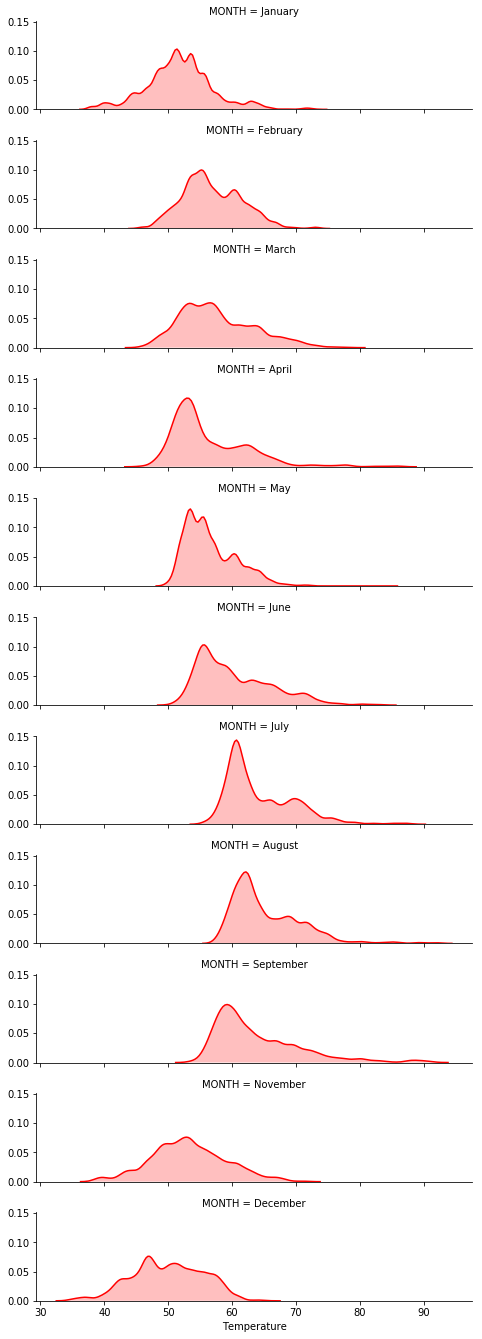

In [7]:
g = sns.FacetGrid(wth_sfo, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "Temperature", color='r', shade=True);

##### Humidity montly distribution

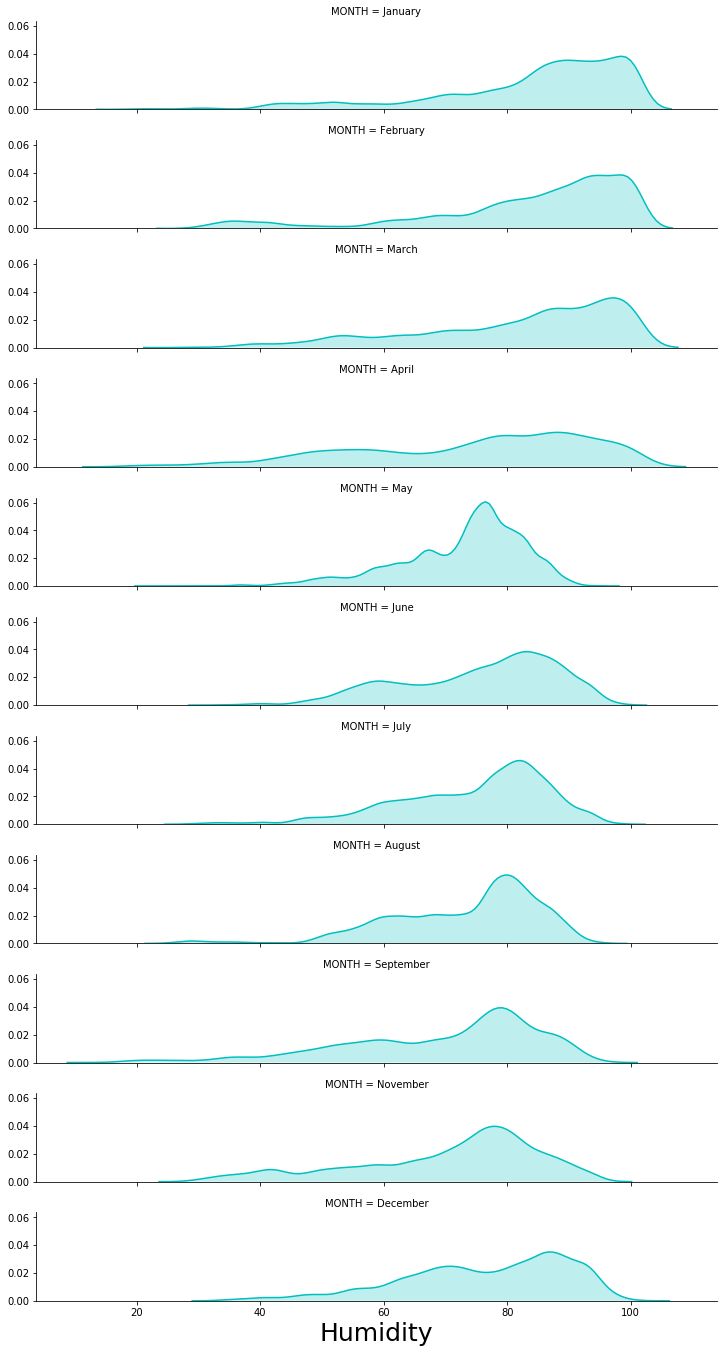

In [8]:
g = sns.FacetGrid(wth_sfo, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=6, legend_out=True)
g.map(sns.kdeplot, "Humidity", color='c', shade=True).set_xlabels(size=25)

In [3]:
flt_sfo = flt[flt.ORIGIN_AIRPORT=='SFO'][['DEPARTURE_DELAY', 'MONTH']]
flt_sfo['MONTH'] = flt_sfo['MONTH'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
flt_sfo = flt_sfo.rename(columns={'DEPARTURE_DELAY':'Departure_Delay'})

##### Departure delay distribution

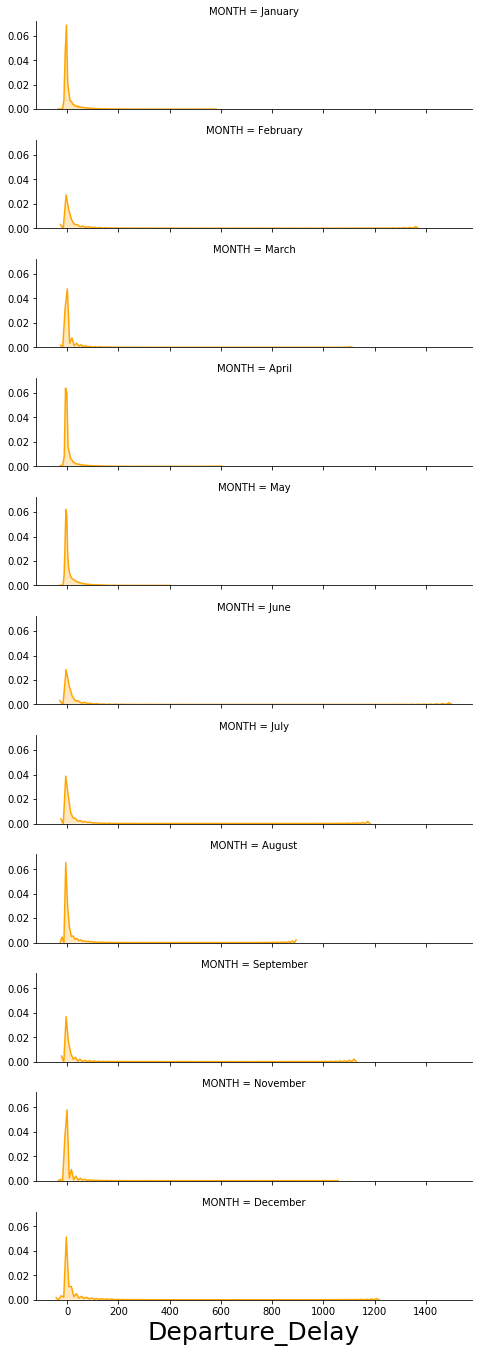

In [7]:
g = sns.FacetGrid(flt_sfo, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=4, legend_out=True)
g.map(sns.kdeplot, "Departure_Delay", color='orange', shade=True).set_xlabels(size=25)

In [8]:
flt_sfo2 = flt[flt.DESTINATION_AIRPORT=='SFO'][['ARRIVAL_DELAY', 'MONTH']]
flt_sfo2['MONTH'] = flt_sfo2['MONTH'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
flt_sfo2 = flt_sfo2.rename(columns={'ARRIVAL_DELAY':'Arrival_Delay'})

##### Arrival delay distribution

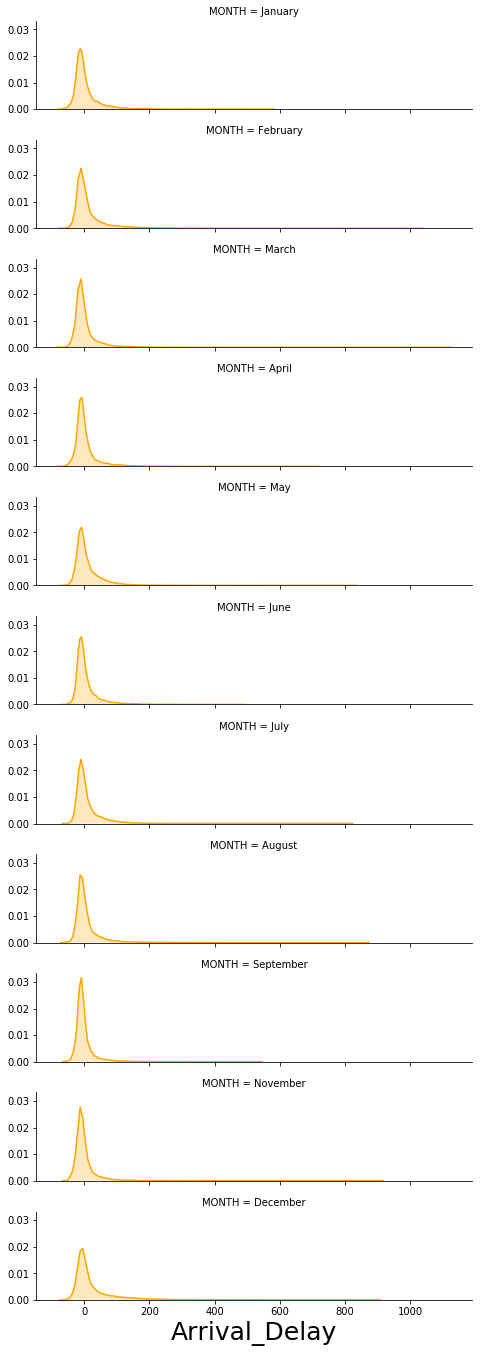

In [9]:
g = sns.FacetGrid(flt_sfo2, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=4, legend_out=True)
g.map(sns.kdeplot, "Arrival_Delay", color='orange', shade=True).set_xlabels(size=25)

##### Wind speed distribution

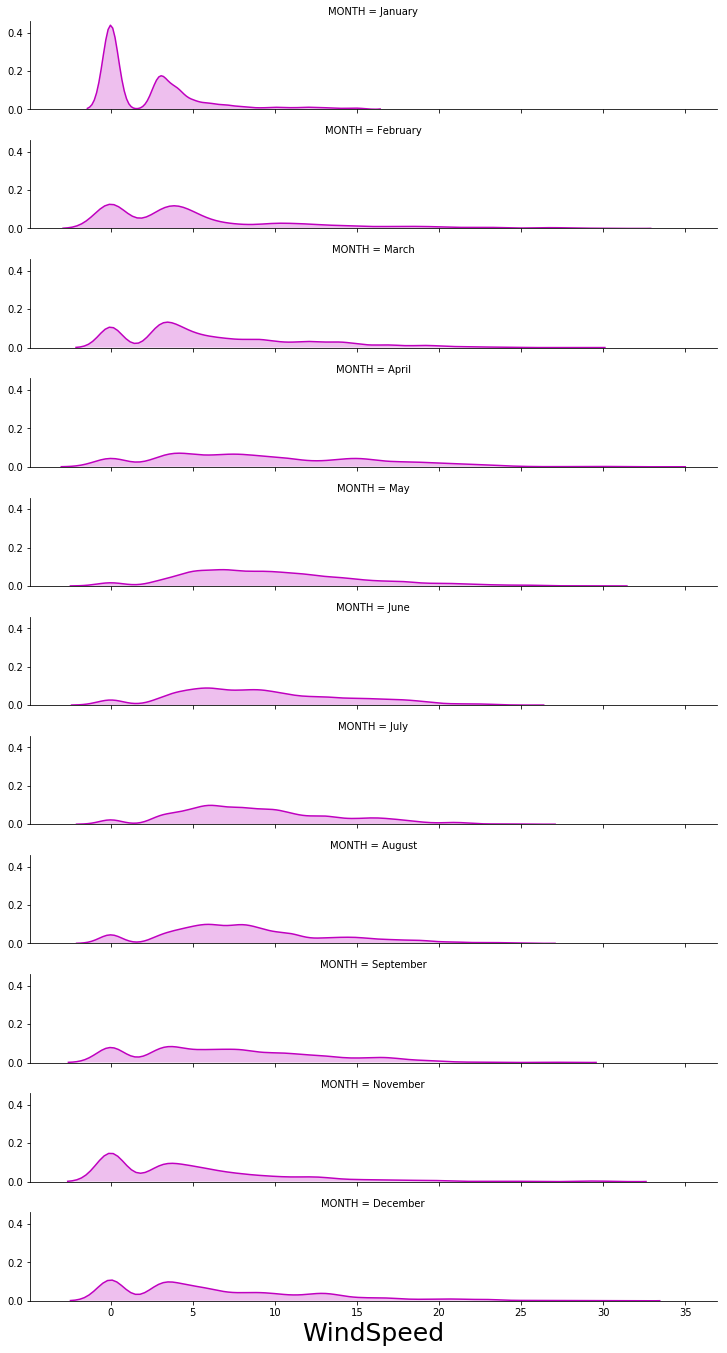

In [10]:
g = sns.FacetGrid(wth_sfo, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=6, legend_out=True)
g.map(sns.kdeplot, "WindSpeed", color='m', shade=True).set_xlabels(size=25)

##### Visibility distribution

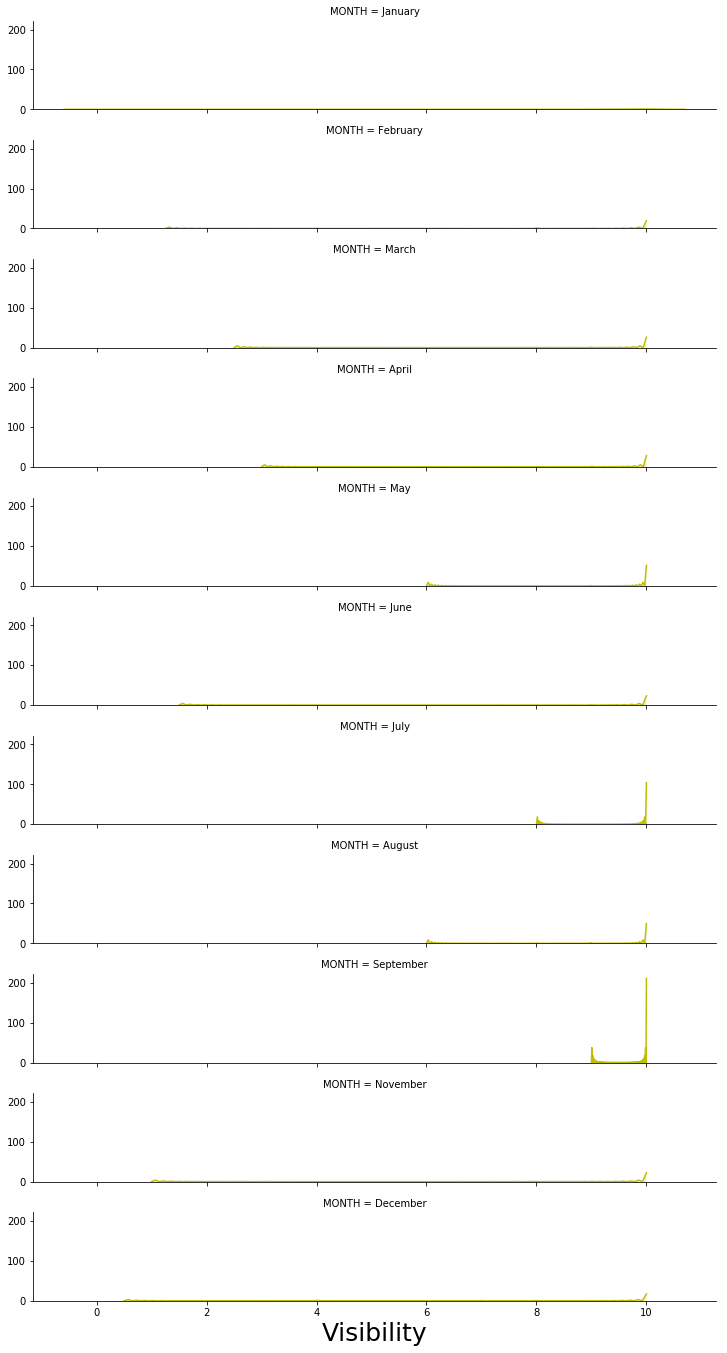

In [11]:
g = sns.FacetGrid(wth_sfo, row="MONTH", row_order=wth_sfo['MONTH'].unique(),
                  height=1.7, aspect=6, legend_out=True)
g.map(sns.kdeplot, "Visibility", color='y', shade=True).set_xlabels(size=25)

##### Comparison of different factors

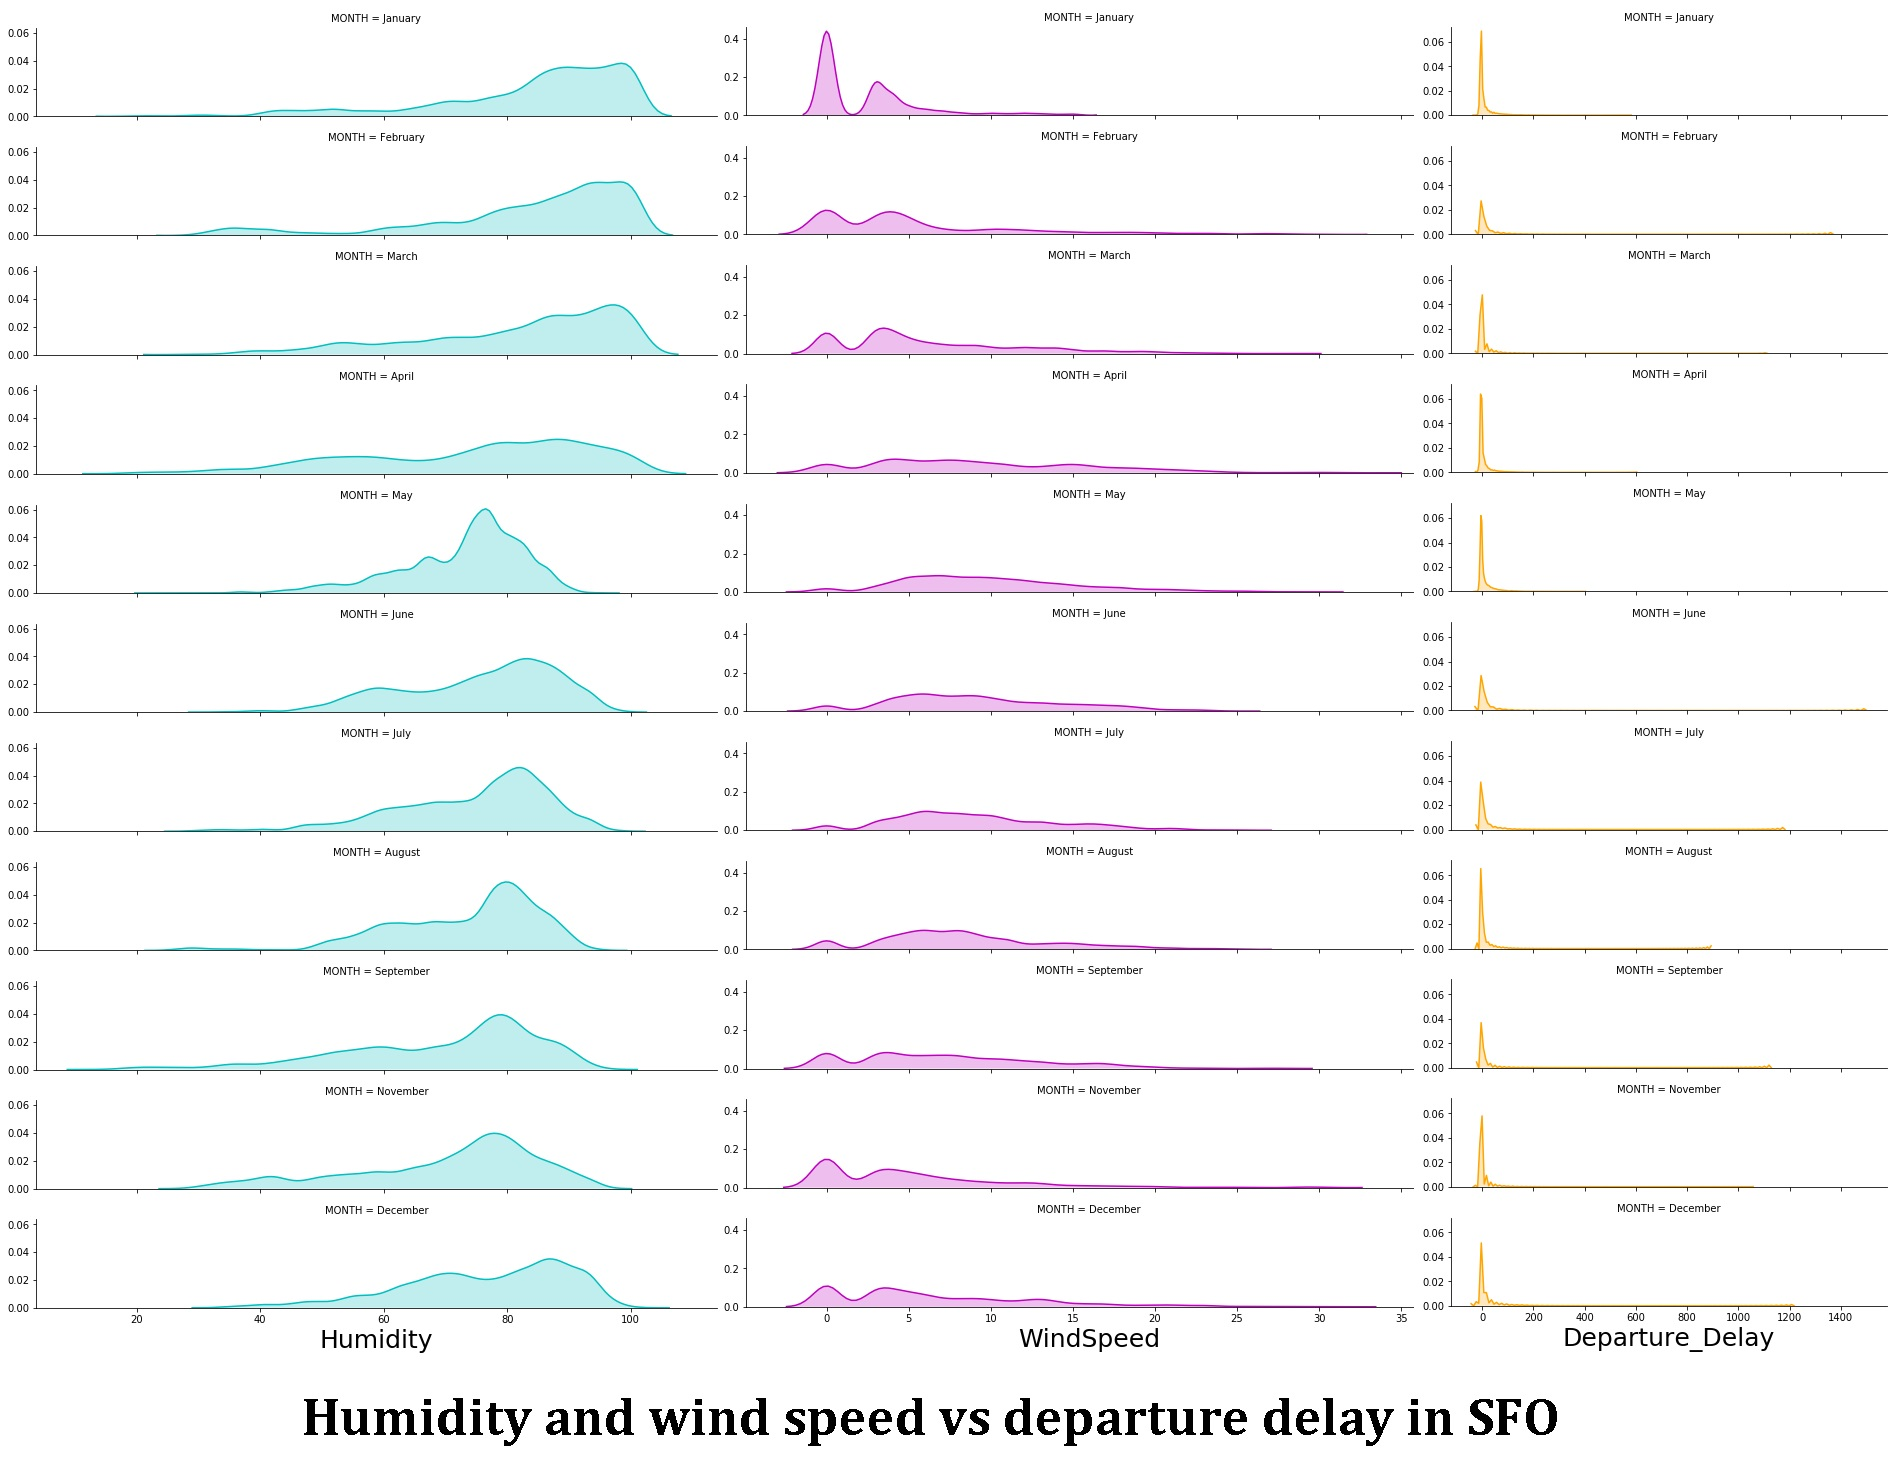

In [12]:
Image(filename='Humidity_WS_DepDelay.jpg')

Looking at this visulisation, we can observe several **patterns**: 
- Departure delays are higher in January, April, May, August and November
- Departure delays are lower in February, June, July and September
- Humidity is higher during the 4 first months of the year
- WindSpeed is higher between May and September

As a result, this visualization does not provide direct evidence of a correlation between the weather seasonality and the month variation of departure delay in SFO.

In [13]:
viz = pd.read_csv('viz2.csv')
viz.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,Lat_org,Lng_org,Lat_dst,Lng_dst
0,AA,LAX,PBI,33.94254,-118.40807,26.68316,-80.09559
1,US,SFO,CLT,37.61900,-122.37484,35.21401,-80.94313
2,AA,LAX,MIA,33.94254,-118.40807,25.79325,-80.29056


In [14]:
grouped = viz.groupby(['Lat_org', 'Lng_org', 'Lat_dst', 'Lng_dst']).count()[['AIRLINE']].rename(columns={'AIRLINE':'Nb_flights'}).reset_index()
grouped2 = grouped.rename(columns={'Lat_org': 'dep_lat', 'Lng_org': 'dep_lon', 'Lat_dst':'arr_lat', 'Lng_dst':'arr_lon', 'Nb_flights':
                'nb_flights'})
grouped2.to_csv('input_map2.csv', index=False)
grouped.head(3)

,Lat_org,Lng_org,Lat_dst,Lng_dst,Nb_flights
0,32.73356,-117.18966,19.73877,-156.04563,115
1,32.73356,-117.18966,20.89865,-156.43046,381
2,32.73356,-117.18966,21.31869,-157.92241,639


##### Creation of a visualization of all the flights that have a departure or an arrival in California

In [15]:
# create gradient to color the routes according to the number of flights
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))

# initialize GCMapper and set data
gcm = GCMapper(cols=grad, height=2000, width=4000)

gcm.set_data(grouped['Lng_org'], grouped['Lat_org'], grouped['Lng_dst'],
             grouped['Lat_dst'], grouped['Nb_flights'])

# run & save
img = gcm.draw()
img.save('flights_map_gcmap.png')

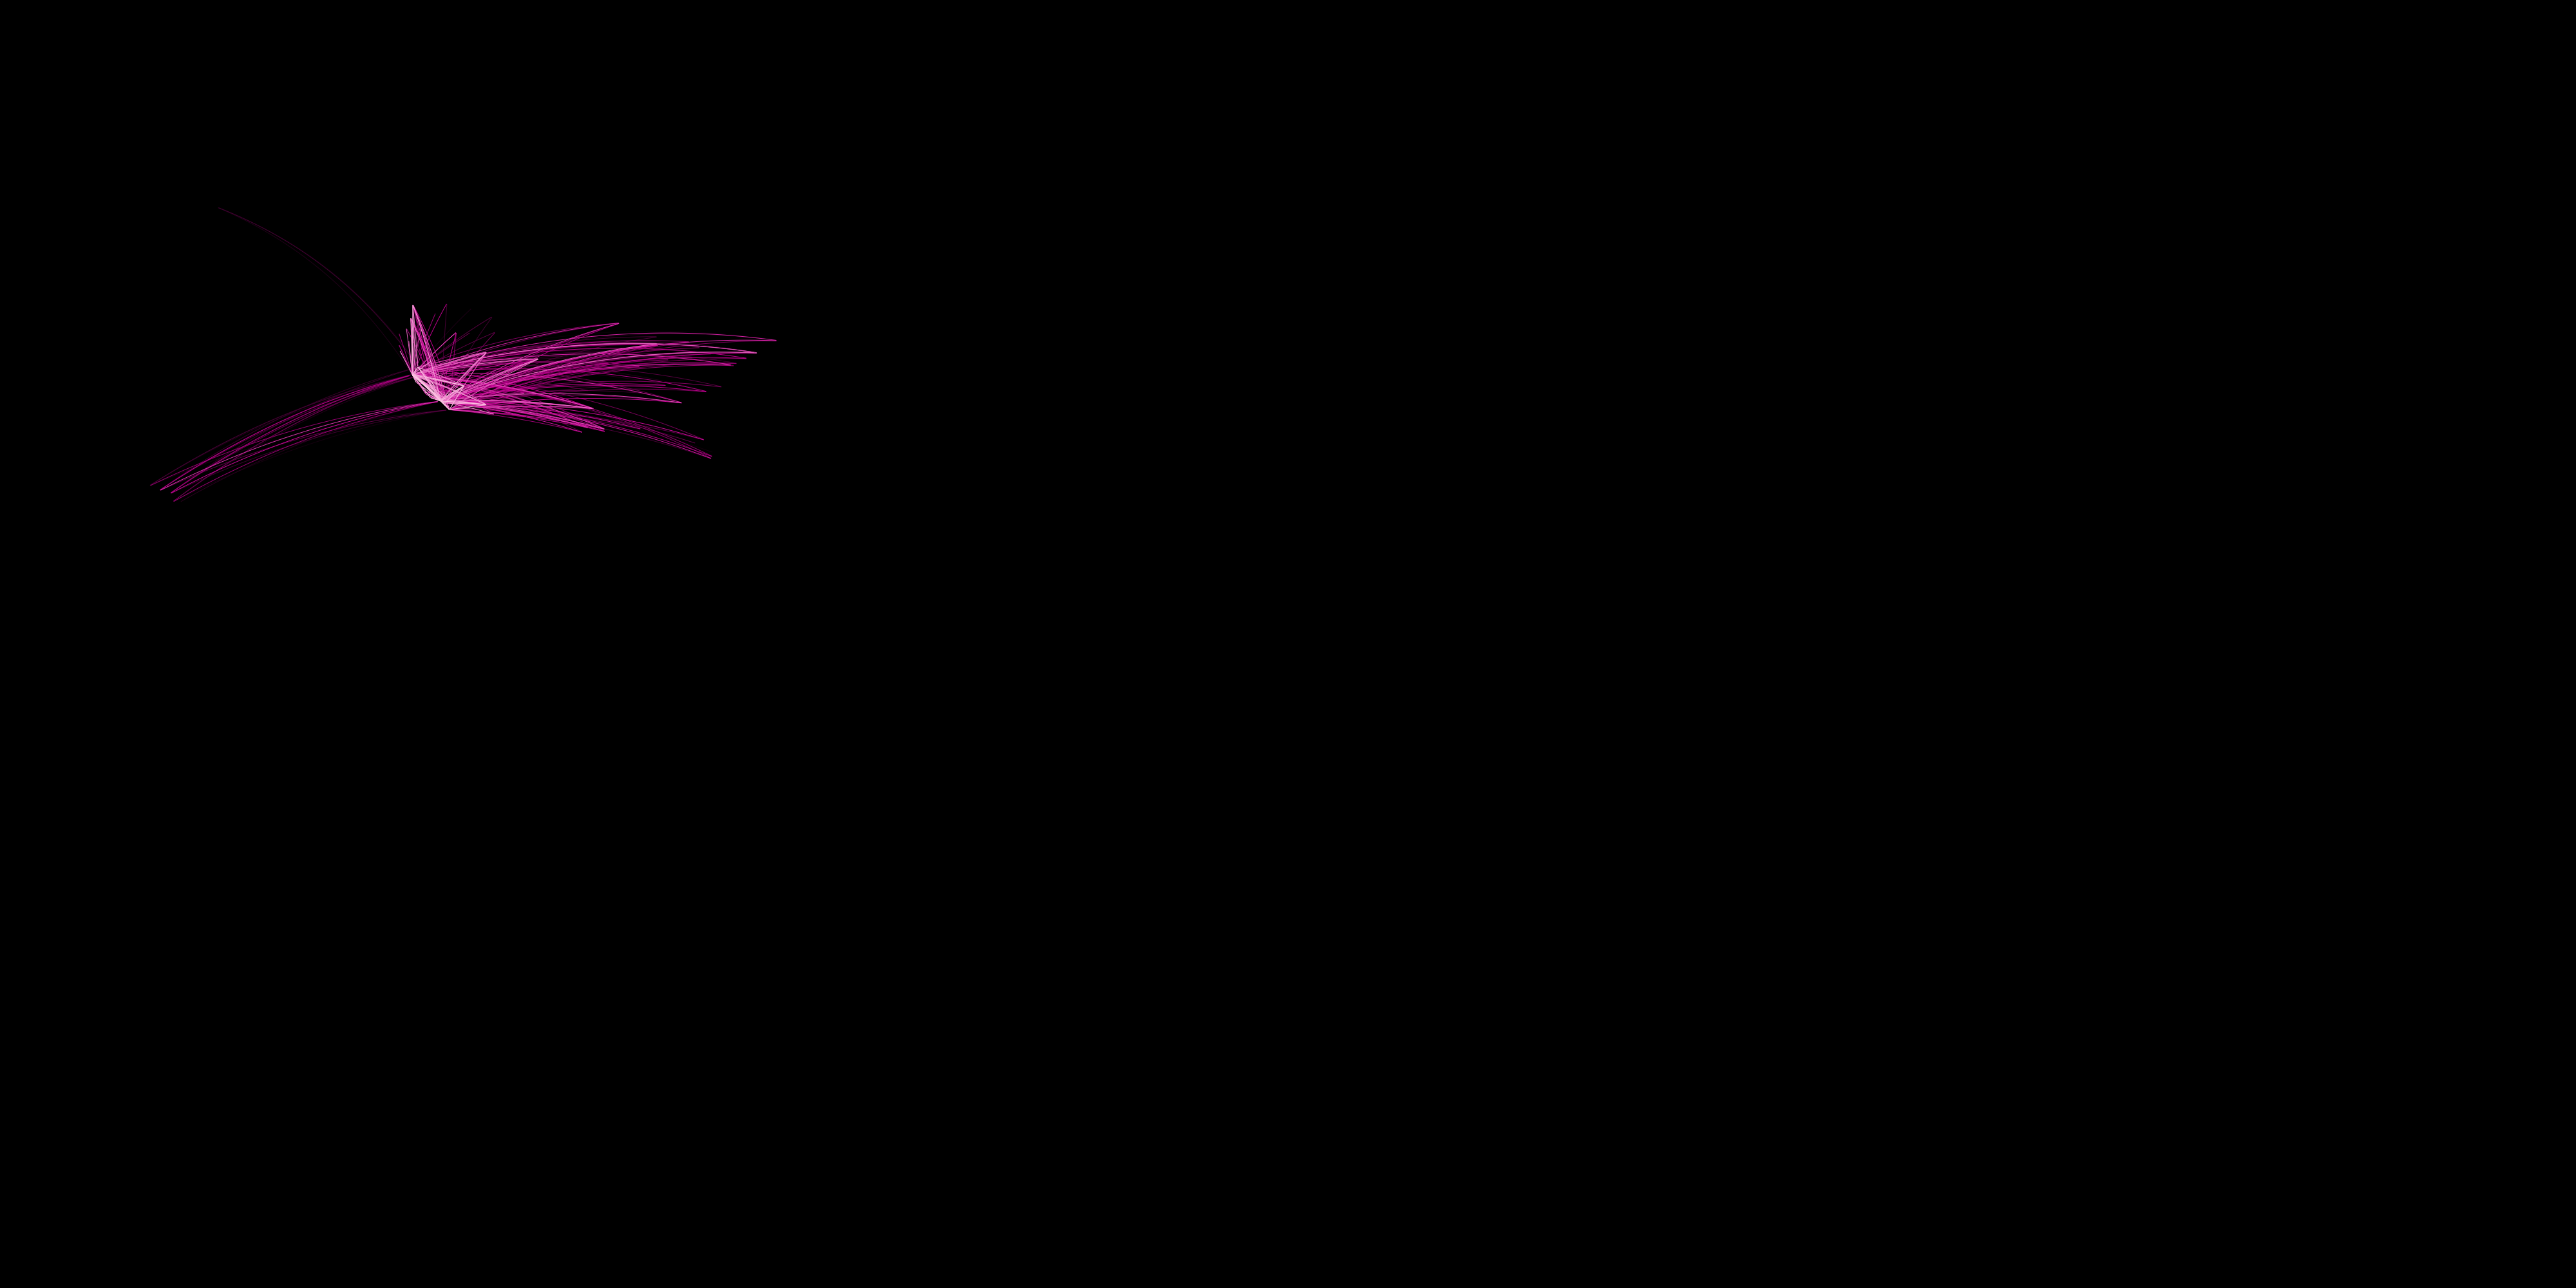

In [16]:
Image(filename='flights_map_gcmap.png')

In [17]:
dat = pd.read_csv('input_map2.csv')
dat.head(2)

,dep_lat,dep_lon,arr_lat,arr_lon,nb_flights
0,32.73356,-117.18966,19.73877,-156.04563,115
1,32.73356,-117.18966,20.89865,-156.43046,381


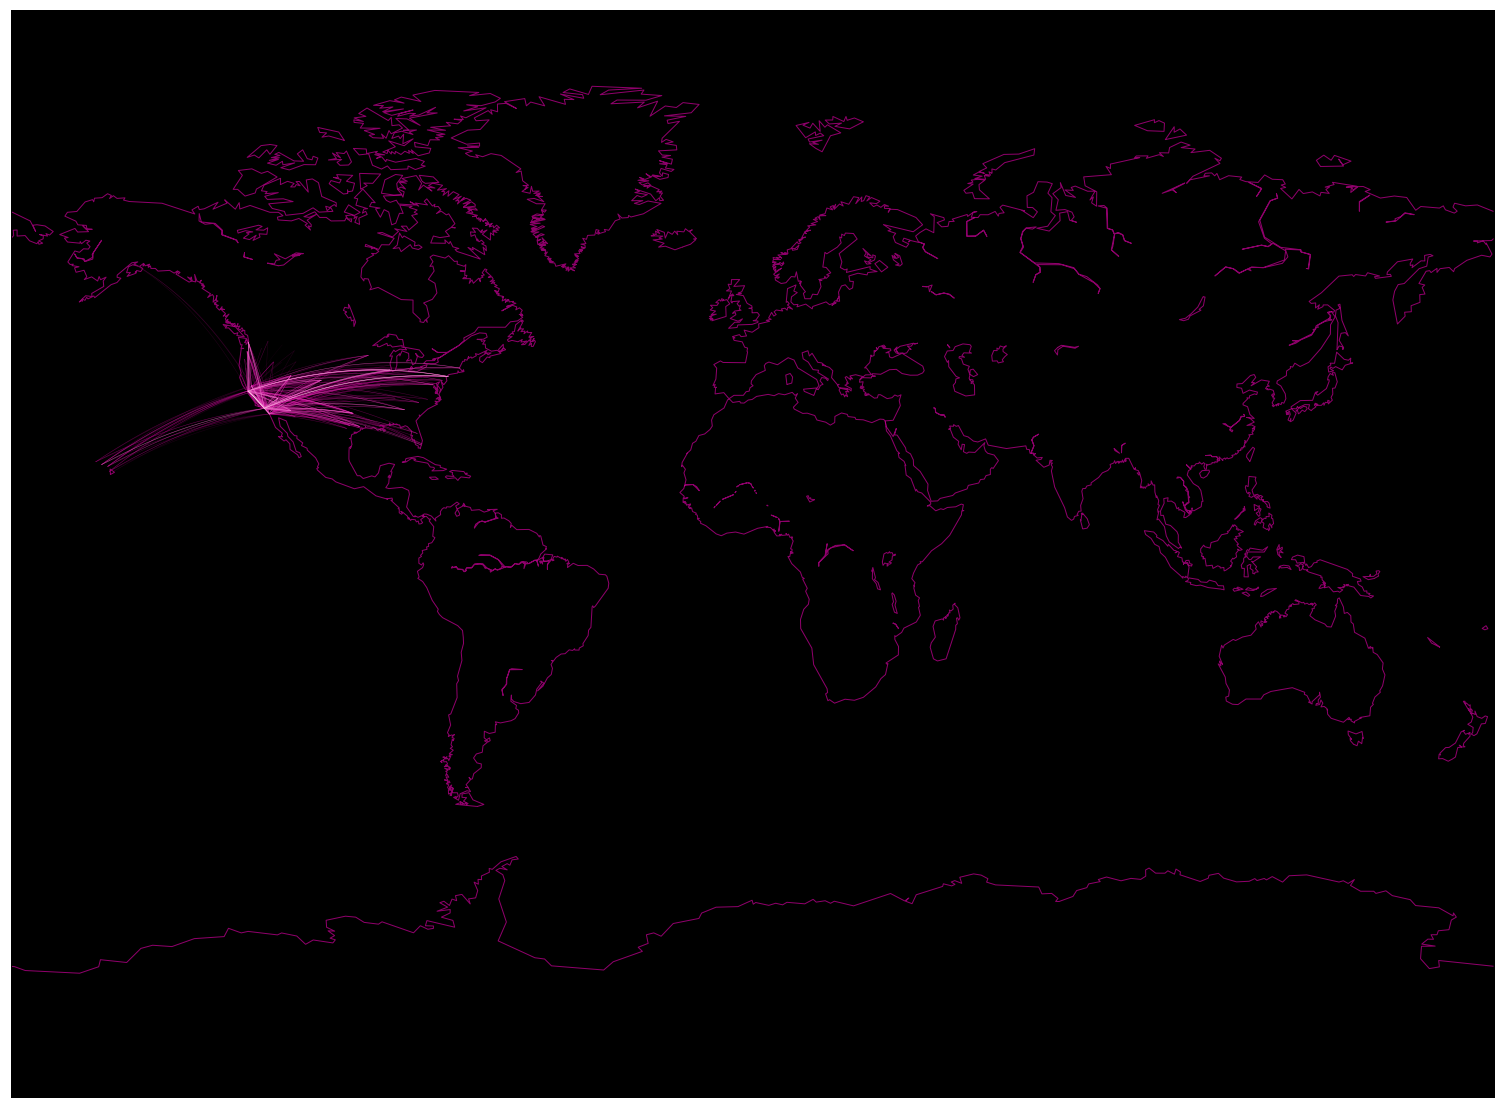

In [18]:
plot_map(in_filename='input_map2.csv', color_mode='screen',
             out_filename='flights_map_mpl.png', absolute=True)

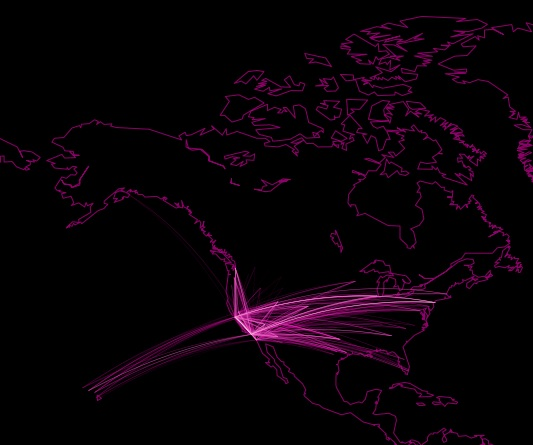

In [19]:
Image(filename='flights_map.png')

## Features Engineering

Let's now dive into the feature engineering part. 

In [3]:
arp_cal = arp[arp.STATE=='CA']
flt_cal_or = flt[(flt.ORIGIN_AIRPORT.isin(arp_cal.IATA_CODE.unique()))]
flt_cal_ds = flt[(flt.DESTINATION_AIRPORT.isin(arp_cal.IATA_CODE.unique()))]
cols_to_use = flt_cal_ds.columns.difference(flt_cal_or.columns)
flt_cal = flt_cal_or.merge(flt_cal_ds[cols_to_use],  left_index=True, right_index=True)

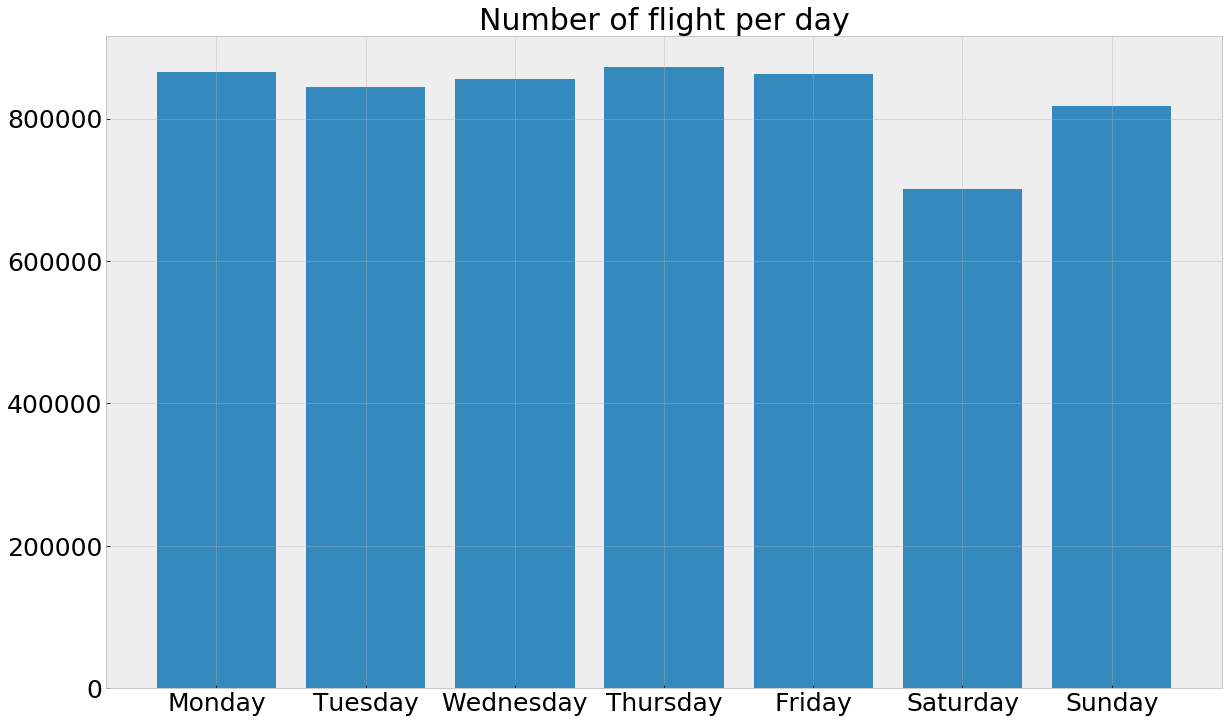

In [26]:
gb_week = flt.groupby('DAY_OF_WEEK').count()[['YEAR']].reset_index().rename(columns={'DAY_OF_WEEK':'Day', 'YEAR':'Count'})
gb_week = gb_week.replace({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})

with plt.style.context('bmh'):
    plt.figure(figsize=(20,12))
    plt.bar(gb_week.Day, gb_week.Count)
    plt.title('Number of flight per day', size=30)
    plt.xticks(size=25)
    plt.yticks(size=25)

In [15]:
features = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY']

anx = flt_cal_or[features]

Text(0.5,1,'Distribution of departure delay')

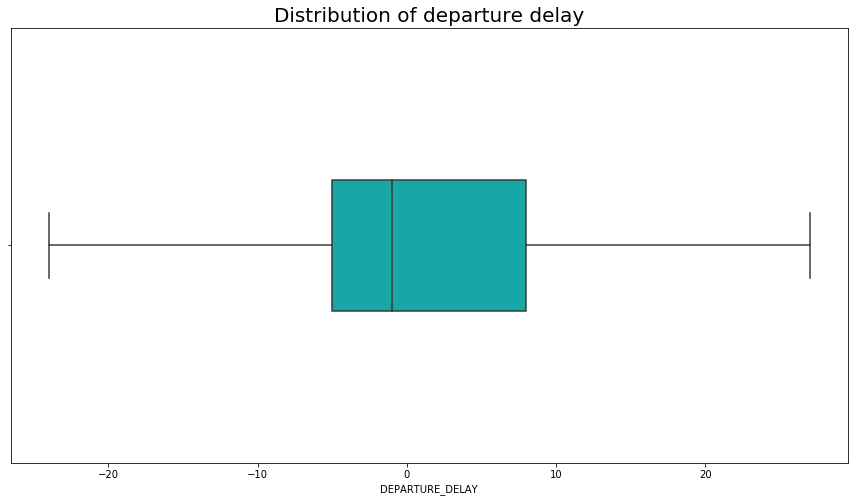

In [28]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(
    anx['DEPARTURE_DELAY'],
    width=0.3, 
    ax=ax,
    showfliers=False,
    color='c'
)

ax.set_title('Distribution of departure delay', size=20)

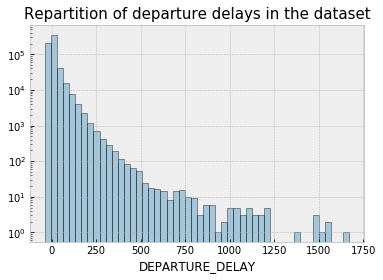

In [37]:
with plt.style.context('bmh'):
    ax = sns.distplot(anx['DEPARTURE_DELAY'].dropna(), kde=False, hist_kws=dict(edgecolor='black', linewidth=1))
    ax.set_yscale('log')
    plt.title('Repartition of departure delays in the dataset', size=15)

Text(0.5,1,'Distribution of arrival delay')

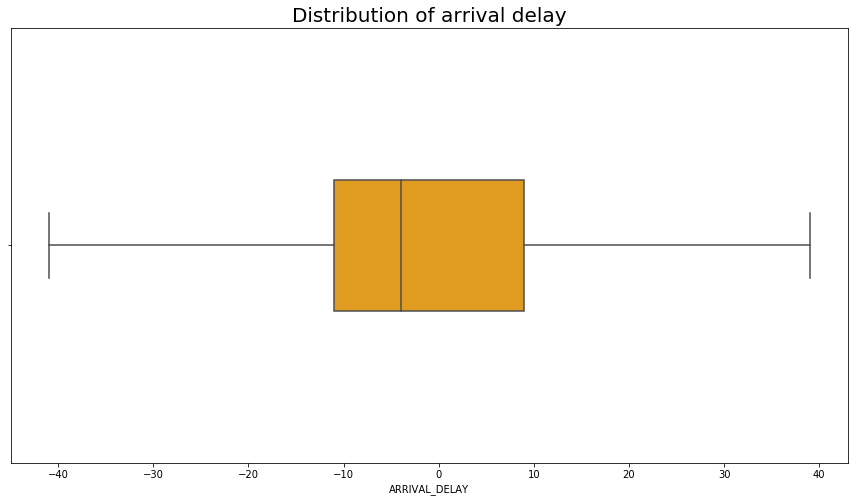

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(
    anx['ARRIVAL_DELAY'],
    width=0.3, 
    ax=ax,
    showfliers=False,
    color='orange'
)

ax.set_title('Distribution of arrival delay', size=20)

In [31]:
# Label Encoding transformation
dat_le = anx.copy().dropna()
origin_to_int = dict((zip(dat_le.ORIGIN_AIRPORT.unique(), range(dat_le.ORIGIN_AIRPORT.unique().shape[0]))))
dest_to_int = dict((zip(dat_le.DESTINATION_AIRPORT.unique(), range(dat_le.DESTINATION_AIRPORT.unique().shape[0]))))  
air_to_int = dict((zip(dat_le.AIRLINE.unique(), range(dat_le.AIRLINE.unique().shape[0]))))  
dat_le['ORIGIN_AIRPORT'] = dat_le['ORIGIN_AIRPORT'].apply(lambda x: origin_to_int[x])
dat_le['DESTINATION_AIRPORT'] = dat_le['DESTINATION_AIRPORT'].apply(lambda x: dest_to_int[x])
dat_le['AIRLINE'] = dat_le['AIRLINE'].apply(lambda x: air_to_int[x])

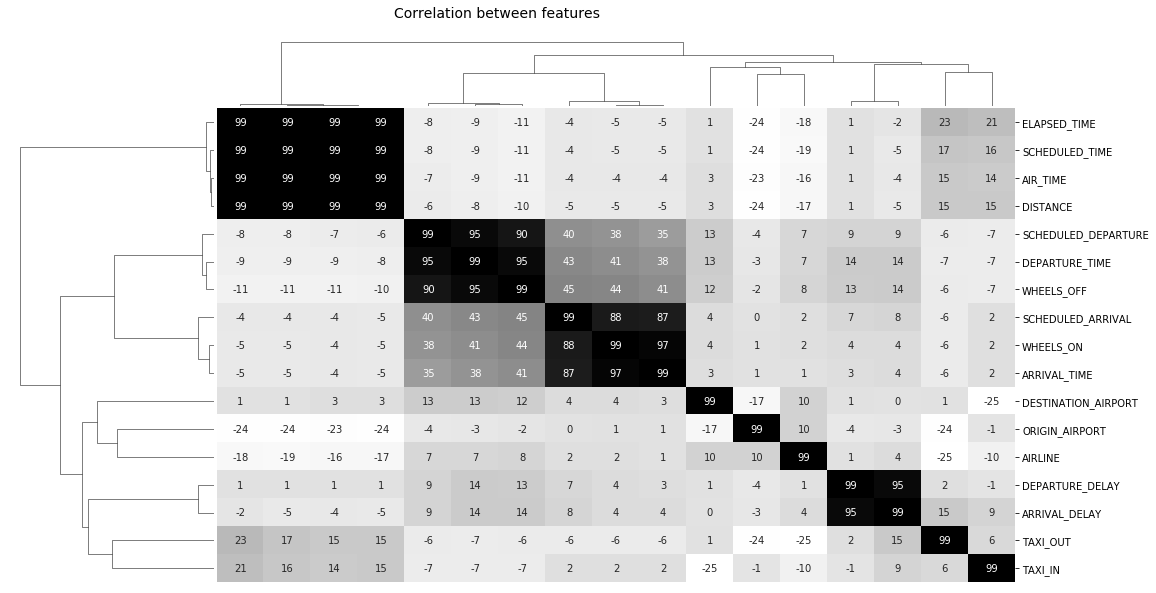

In [32]:
cor = dat_le.corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=14) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [33]:
useful_feat = ['AIR_TIME', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY',
               'DESTINATION_AIRPORT', 'TAXI_OUT', 'TAXI_IN']
dat_le2 = dat_le[useful_feat]

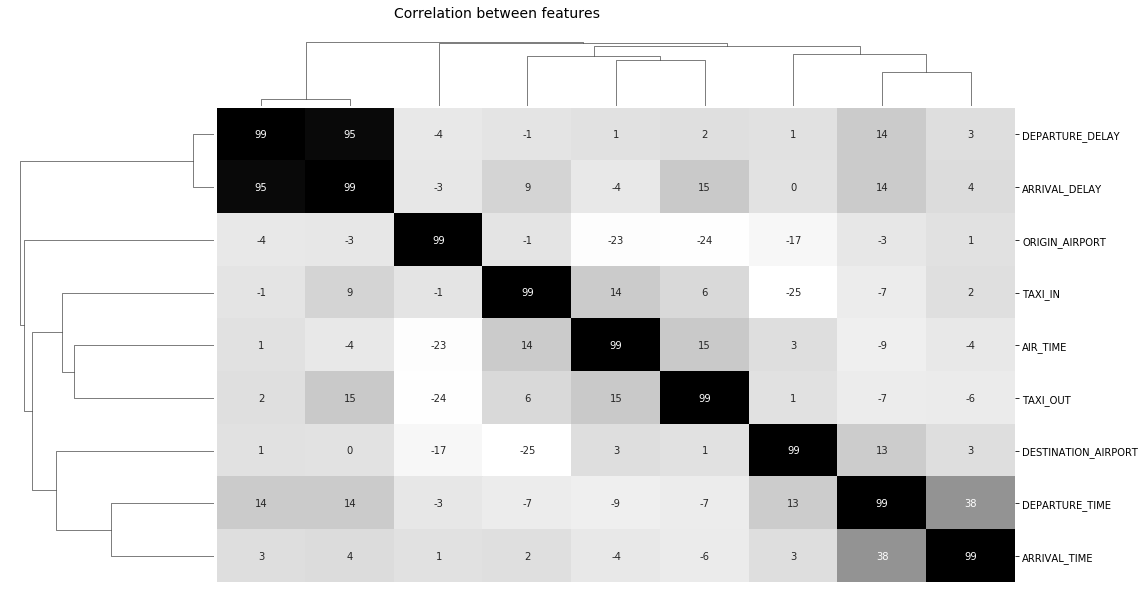

In [34]:
cor = dat_le2.corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=14) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [35]:
def good_metrics(x):
    d = {}
    d['mean'] = x['ARRIVAL_DELAY'].mean()
    d['size'] = x.count()['ORIGIN_AIRPORT']    
    return pd.Series(d, index=['mean', 'size'])

In [36]:
gb_air = anx.groupby('AIRLINE').apply(good_metrics).reset_index()

In [37]:
import plotly.plotly as py
import cufflinks as cf

In [38]:
cf.set_config_file(offline=False, world_readable=True, theme='pearl')
gb_air.iplot(kind='bubble', x='AIRLINE', y='mean', size='size', text='AIRLINE',
             xTitle='Airlines', yTitle='Average arrival delay',
             filename='airline-bubble-chart')

Let's create a dataframe with all the features we think can be relevant in the prediction of the delay.

In [39]:
flt.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [47]:
flt_del = flt_cal[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].dropna().reset_index(drop=True)

flt_del.head(3)

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAY,ARRIVAL_DELAY
0,34.0,0.0,0.0,0.0,54.0,54.0,88.0
1,0.0,0.0,0.0,0.0,17.0,31.0,17.0
2,0.0,0.0,21.0,0.0,0.0,26.0,21.0


In [48]:
flt_del.shape

(44067, 7)

In [49]:
flt_cal.shape

(208859, 31)

In [54]:
airSD_pc = flt_del[flt_del.AIR_SYSTEM_DELAY>0].shape[0]/flt_del.shape[0]
SD_pc = flt_del[flt_del.SECURITY_DELAY>0].shape[0]/flt_del.shape[0]
AD_pc = flt_del[flt_del.AIRLINE_DELAY>0].shape[0]/flt_del.shape[0]
LAD_pc = flt_del[flt_del.LATE_AIRCRAFT_DELAY>0].shape[0]/flt_del.shape[0]
WD_pc = flt_del[flt_del.WEATHER_DELAY>0].shape[0]/flt_del.shape[0]

airSD_mean = np.mean(flt_del[flt_del.AIR_SYSTEM_DELAY>0].AIR_SYSTEM_DELAY)
SD_mean = np.mean(flt_del[flt_del.SECURITY_DELAY>0].SECURITY_DELAY)
AD_mean = np.mean(flt_del[flt_del.AIRLINE_DELAY>0].AIRLINE_DELAY)
LAD_mean = np.mean(flt_del[flt_del.LATE_AIRCRAFT_DELAY>0].LATE_AIRCRAFT_DELAY)
WD_mean = np.mean(flt_del[flt_del.WEATHER_DELAY>0].WEATHER_DELAY)

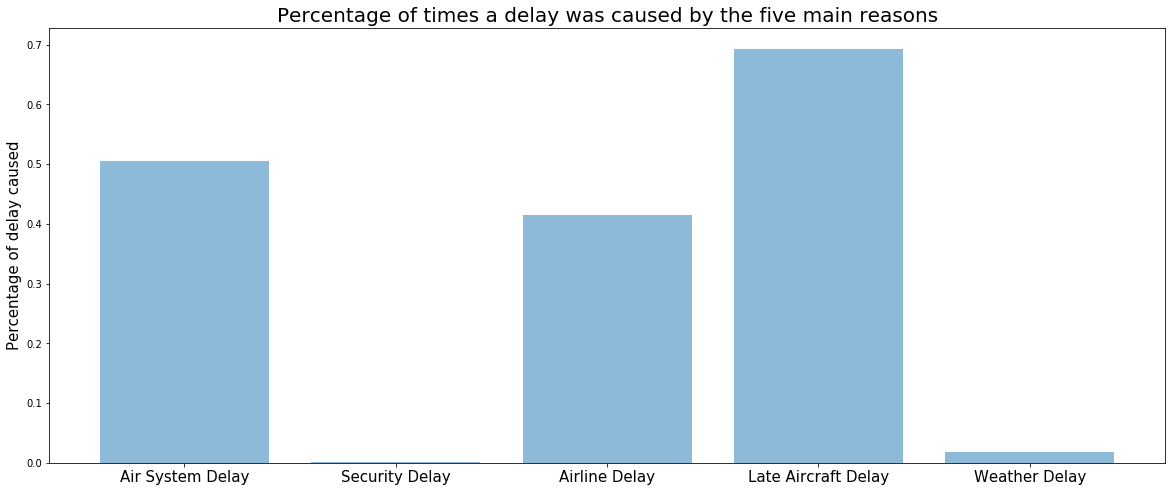

In [58]:
delay_reasons = ('Air System Delay', 'Security Delay', 'Airline Delay', 'Late Aircraft Delay', 'Weather Delay')
y_pos = np.arange(len(delay_reasons))
percent = [airSD_pc, SD_pc, AD_pc, LAD_pc, WD_pc]
 
plt.figure(figsize=(20,8))    
plt.bar(y_pos, percent, align='center', alpha=0.5)
plt.xticks(y_pos, delay_reasons, size=15)
plt.ylabel('Percentage of delay caused', size=15)
plt.title('Percentage of times a delay was caused by the five main reasons', size=20)
 
plt.show()

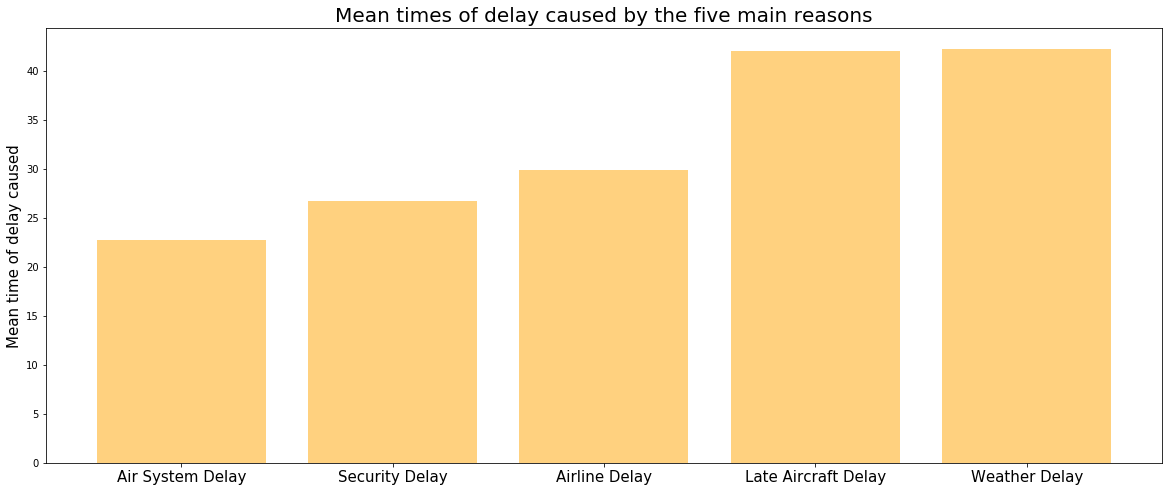

In [60]:
delay_reasons = ('Air System Delay', 'Security Delay', 'Airline Delay', 'Late Aircraft Delay', 'Weather Delay')
y_pos = np.arange(len(delay_reasons))
percent = [airSD_mean, SD_mean, AD_mean, LAD_mean, WD_mean]
 
plt.figure(figsize=(20,8))    
plt.bar(y_pos, percent, align='center', alpha=0.5, color='orange')
plt.xticks(y_pos, delay_reasons, size=15)
plt.ylabel('Mean time of delay caused', size=15)
plt.title('Mean times of delay caused by the five main reasons', size=20)
 
plt.show()

In [63]:
flt_cal_ft = flt_cal[['AIR_TIME', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY',
               'DESTINATION_AIRPORT', 'TAXI_OUT', 'TAXI_IN']]
flt_cal_ft.head(3)

,AIR_TIME,DEPARTURE_TIME,ARRIVAL_TIME,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN
59,61.0,513.0,638.0,ONT,13.0,9.0,SFO,19.0,5.0
90,NaN,NaN,NaN,RDD,NaN,NaN,SFO,NaN,NaN
101,42.0,530.0,650.0,FAT,-5.0,0.0,LAX,33.0,5.0


In [65]:
flt_cal_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208859 entries, 59 to 5819005
Data columns (total 9 columns):
AIR_TIME               204209 non-null float64
DEPARTURE_TIME         204537 non-null float64
ARRIVAL_TIME           204344 non-null float64
ORIGIN_AIRPORT         208859 non-null object
DEPARTURE_DELAY        204537 non-null float64
ARRIVAL_DELAY          204209 non-null float64
DESTINATION_AIRPORT    208859 non-null object
TAXI_OUT               204459 non-null float64
TAXI_IN                204344 non-null float64
dtypes: float64(7), object(2)
memory usage: 15.9+ MB


In [66]:
flt_cal_ft = flt_cal_ft.dropna()

In [4]:
wth = wth.rename(columns={'tmpf':'Temperature', 'sknt':'WindSpeed', 'vsby':'Visibility', 'relh':'Humidity', 'alti':'Pressure'})

In [73]:
wth.shape

(647911, 60)

In [80]:
wth.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'HOUR', 'MINUTE',
       'DATETIME_DEPARTURE', 'DATE_DEPARTURE', 'station',
       'closest_weather_measure', 'lon', 'lat', 'Temperature', 'dwpf',
       'Humidity', 'drct', 'WindSpeed', 'p01i', 'Pressure', 'mslp',
       'Visibility', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1',
       'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'feel'],
      dtype='object')

In [79]:
len(wth.TAIL_NUMBER.unique())

3905

In [5]:
wth_ft = wth[['AIR_TIME', 'DEPARTURE_TIME', 'AIRLINE', 'ARRIVAL_TIME', 'ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY',
               'DESTINATION_AIRPORT', 'TAXI_OUT', 'TAXI_IN', 'Temperature', 'WindSpeed', 'Visibility', 'Humidity', 'Pressure']]

In [82]:
wth_ft.shape

(647911, 14)

In [84]:
wth_ft.head(3)

,AIR_TIME,DEPARTURE_TIME,ARRIVAL_TIME,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure
0,263.0,2.0,741.0,LAX,-8.0,-9.0,PBI,12.0,4.0,53.06,10.0,10.0,19.90,30.01
1,266.0,18.0,811.0,SFO,-2.0,5.0,CLT,16.0,11.0,53.06,7.0,10.0,44.48,30.09
2,258.0,15.0,756.0,LAX,-5.0,-9.0,MIA,15.0,8.0,53.06,10.0,10.0,19.90,30.01


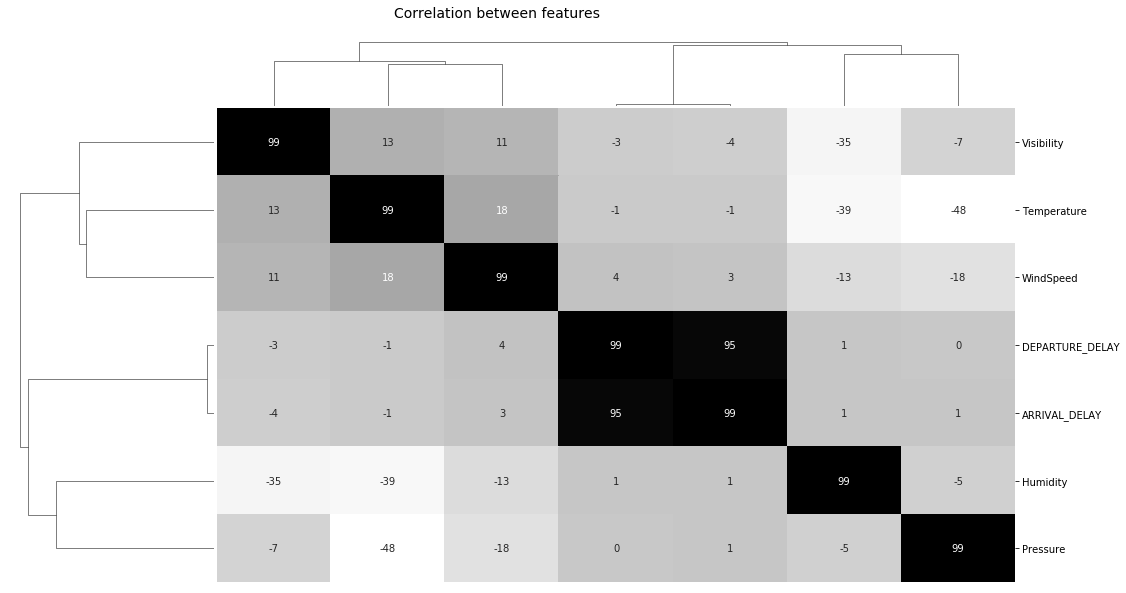

In [85]:
cor = wth_ft[['Temperature', 'WindSpeed', 'Visibility', 'Humidity', 'Pressure', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=14) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [102]:
from sklearn.ensemble import RandomForestRegressor

def get_feat_importance(X, out, pred_name):

    #This function evaluate the importance of each input feature in the prediction of the given output metric
    forest = RandomForestRegressor(n_estimators=100, random_state=0, max_features=5)
    
    feat = {"f1":u"Temperature",
    "f2":u"WindSpeed",
    "f3":u"Visibility",
    "f4":u"Humidity",
    "f5":u"Pressure",
    "f6":u"AIR_TIME",
    "f7":u"DEPARTURE_TIME",
    "f8":u"ARRIVAL_TIME",
    "f9":u"ORIGIN_AIRPORT",
    "f10":u"DESTINATION_AIRPORT",
    "f11":u"TAXI_OUT",
    "f12":u"TAXI_IN",
    "f13":u"AIRLINE",
           }
    forest.fit(X, out)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importancies of the forest
    num_to_plot = 13
    feature_indices = [ind+1 for ind in indices[:num_to_plot]]
    
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(num_to_plot):
        print("%d. %s %f " % (f + 1, 
                feat["f"+str(feature_indices[f])], 
                importances[indices[f]]))

    plt.figure(figsize=(15,5))
    plt.title(u"Feature Importance to predict {}".format(pred_name), size=25)
    bars = plt.bar(range(num_to_plot), 
                   importances[indices[:num_to_plot]],
           color=([str(i/float(num_to_plot+1)) 
                   for i in range(num_to_plot)]),
                   align="center")
    ticks = plt.xticks(range(num_to_plot), 
                       feature_indices)
    plt.ylabel('Percentage', size=20)
    plt.xlim([-1, num_to_plot])
    leg = [u''.join(feat["f"+str(i)]) for i in feature_indices]
    plt.legend(bars, leg, fontsize='x-large', bbox_to_anchor=(1, 1));

    return

In [87]:
wth_ft.head(1)

,AIR_TIME,DEPARTURE_TIME,ARRIVAL_TIME,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure
0,263.0,2.0,741.0,LAX,-8.0,-9.0,PBI,12.0,4.0,53.06,10.0,10.0,19.9,30.01


In [50]:
wth_ft_le = wth_ft.copy().dropna()
origin_to_int = dict((zip(wth_ft_le.ORIGIN_AIRPORT.unique(), range(wth_ft_le.ORIGIN_AIRPORT.unique().shape[0]))))
dest_to_int = dict((zip(wth_ft_le.DESTINATION_AIRPORT.unique(), range(wth_ft_le.DESTINATION_AIRPORT.unique().shape[0]))))  
air_to_int = dict((zip(wth_ft_le.AIRLINE.unique(), range(wth_ft_le.AIRLINE.unique().shape[0]))))  
wth_ft_le['ORIGIN_AIRPORT'] = wth_ft_le['ORIGIN_AIRPORT'].apply(lambda x: origin_to_int[x])
wth_ft_le['DESTINATION_AIRPORT'] = wth_ft_le['DESTINATION_AIRPORT'].apply(lambda x: dest_to_int[x])
wth_ft_le['AIRLINE'] = wth_ft_le['AIRLINE'].apply(lambda x: air_to_int[x])

In [92]:
X_le = wth_ft_le[['AIR_TIME', 'DEPARTURE_TIME', 'AIRLINE', 'ARRIVAL_TIME', 'ORIGIN_AIRPORT',
               'DESTINATION_AIRPORT', 'TAXI_OUT', 'TAXI_IN', 'Temperature', 'WindSpeed', 'Visibility', 'Humidity', 'Pressure']]
AD_le = wth_ft_le['ARRIVAL_DELAY']
DD_le = wth_ft_le['DEPARTURE_DELAY']

Feature ranking:
1. Humidity 0.160493 
2. WindSpeed 0.146631 
3. Temperature 0.099396 
4. TAXI_IN 0.088463 
5. ORIGIN_AIRPORT 0.075687 


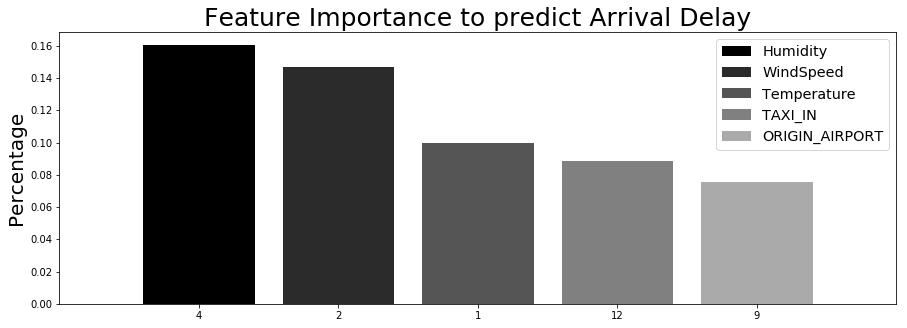

In [97]:
get_feat_importance(X_le, AD_le, pred_name='Arrival Delay')

Feature ranking:
1. Humidity 0.160493 
2. WindSpeed 0.146631 
3. Temperature 0.099396 
4. TAXI_IN 0.088463 
5. ORIGIN_AIRPORT 0.075687 
6. DEPARTURE_TIME 0.074739 
7. AIRLINE 0.072371 
8. AIR_TIME 0.060375 
9. ARRIVAL_TIME 0.056790 
10. DESTINATION_AIRPORT 0.050948 
11. Visibility 0.047589 
12. Pressure 0.047230 
13. TAXI_OUT 0.019290 


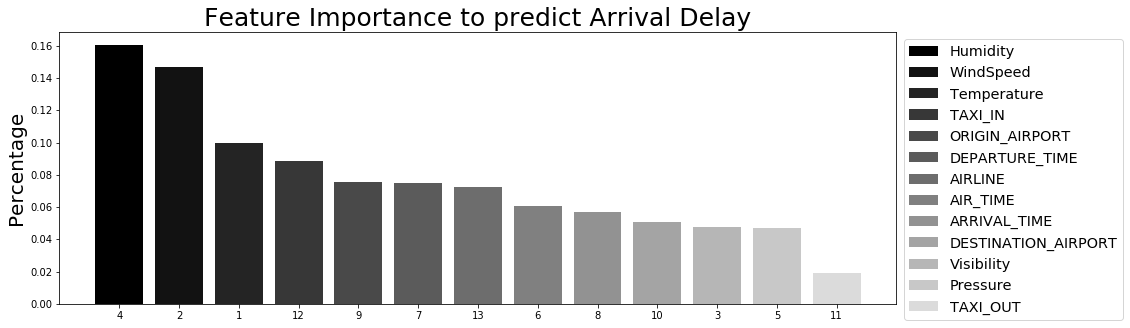

In [103]:
get_feat_importance(X_le, AD_le, pred_name='Arrival Delay')

In [22]:
arp_cal = arp[arp.STATE=='CA']
dat_cal_or = wth[(wth.ORIGIN_AIRPORT.isin(arp_cal.IATA_CODE.unique()))]
dat_cal_ds = wth[(wth.DESTINATION_AIRPORT.isin(arp_cal.IATA_CODE.unique()))]
cols_to_use = dat_cal_ds.columns.difference(dat_cal_or.columns)
dat_cal = dat_cal_or.merge(dat_cal_ds[cols_to_use],  left_index=True, right_index=True)

In [23]:
dat_cal = dat_cal.rename(columns={'tmpf':'Temperature', 'sknt':'WindSpeed', 'vsby':'Visibility', 'relh':'Humidity', 'alti':'Pressure'})

In [24]:
dat_cal = dat_cal[['AIR_TIME', 'DEPARTURE_TIME', 'AIRLINE', 'ARRIVAL_TIME', 'ORIGIN_AIRPORT',
               'DESTINATION_AIRPORT', 'TAXI_OUT', 'TAXI_IN', 'Temperature', 'WindSpeed', 'Visibility', 'Humidity', 'Pressure']].dropna()

In [25]:
dat_cal.head(1)

,AIR_TIME,DEPARTURE_TIME,AIRLINE,ARRIVAL_TIME,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure
10,61.0,513.0,OO,638.0,ONT,SFO,19.0,5.0,39.02,0.0,10.0,44.18,30.04


In [26]:
dat_ohe = dat_cal.copy().dropna()
X = dat_ohe[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
X[X.columns] = X[X.columns].astype('category')
X = pd.get_dummies(X, prefix=X.columns)

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [27]:
X.shape

(203864, 53)

In [28]:
Y = pd.concat([dat_cal.drop(columns=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']), X], axis=1)

In [29]:
Y.head(1)

,AIR_TIME,DEPARTURE_TIME,ARRIVAL_TIME,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure,...,DESTINATION_AIRPORT_PSP,DESTINATION_AIRPORT_RDD,DESTINATION_AIRPORT_SAN,DESTINATION_AIRPORT_SBA,DESTINATION_AIRPORT_SBP,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SMX,DESTINATION_AIRPORT_SNA
10,61.0,513.0,638.0,19.0,5.0,39.02,0.0,10.0,44.18,30.04,...,0,0,0,0,0,1,0,0,0,0


In [30]:
wth.shape

(647911, 60)

In [32]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203864 entries, 10 to 647896
Data columns (total 63 columns):
AIR_TIME                   203864 non-null float64
DEPARTURE_TIME             203864 non-null float64
ARRIVAL_TIME               203864 non-null float64
TAXI_OUT                   203864 non-null float64
TAXI_IN                    203864 non-null float64
Temperature                203864 non-null float64
WindSpeed                  203864 non-null float64
Visibility                 203864 non-null float64
Humidity                   203864 non-null float64
Pressure                   203864 non-null float64
AIRLINE_AA                 203864 non-null uint8
AIRLINE_AS                 203864 non-null uint8
AIRLINE_B6                 203864 non-null uint8
AIRLINE_DL                 203864 non-null uint8
AIRLINE_NK                 203864 non-null uint8
AIRLINE_OO                 203864 non-null uint8
AIRLINE_UA                 203864 non-null uint8
AIRLINE_VX                 203864 n

In [33]:
Y.to_csv('data_ohe.csv', index=False)

In [35]:
# Label Encoding transformation
dat_le = dat_cal.copy().dropna()
origin_to_int = dict((zip(dat_le.ORIGIN_AIRPORT.unique(), range(dat_le.ORIGIN_AIRPORT.unique().shape[0]))))
dest_to_int = dict((zip(dat_le.DESTINATION_AIRPORT.unique(), range(dat_le.DESTINATION_AIRPORT.unique().shape[0]))))  
air_to_int = dict((zip(dat_le.AIRLINE.unique(), range(dat_le.AIRLINE.unique().shape[0]))))  
dat_le['ORIGIN_AIRPORT'] = dat_le['ORIGIN_AIRPORT'].apply(lambda x: origin_to_int[x])
dat_le['DESTINATION_AIRPORT'] = dat_le['DESTINATION_AIRPORT'].apply(lambda x: dest_to_int[x])
dat_le['AIRLINE'] = dat_le['AIRLINE'].apply(lambda x: air_to_int[x])

In [37]:
dat_le.head(3)

,AIR_TIME,DEPARTURE_TIME,AIRLINE,ARRIVAL_TIME,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure
10,61.0,513.0,0,638.0,0,0,19.0,5.0,39.02,0.0,10.0,44.18,30.04
13,42.0,530.0,0,650.0,1,1,33.0,5.0,35.06,3.0,4.0,84.69,30.13
27,52.0,605.0,1,717.0,2,1,11.0,9.0,44.96,4.0,10.0,70.52,30.08


In [38]:
dat_le.to_csv('data_le.csv')

In [8]:
wth_ft_le.head(3)

,AIR_TIME,DEPARTURE_TIME,AIRLINE,ARRIVAL_TIME,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DESTINATION_AIRPORT,TAXI_OUT,TAXI_IN,Temperature,WindSpeed,Visibility,Humidity,Pressure
0,263.0,2.0,0,741.0,0,-8.0,-9.0,0,12.0,4.0,53.06,10.0,10.0,19.90,30.01
1,266.0,18.0,1,811.0,1,-2.0,5.0,1,16.0,11.0,53.06,7.0,10.0,44.48,30.09
2,258.0,15.0,0,756.0,0,-5.0,-9.0,2,15.0,8.0,53.06,10.0,10.0,19.90,30.01


In [11]:
wth_ft_le[['DEPARTURE_DELAY', 'TAXI_OUT']].describe()

,DEPARTURE_DELAY,TAXI_OUT
count,637417.000000,637417.000000
mean,9.454480,15.135528
std,35.216548,7.171435
min,-38.000000,1.000000
25%,-5.000000,10.000000
50%,-1.000000,14.000000
75%,8.000000,18.000000
max,1670.000000,176.000000


In [ ]:
scaler = StandardScaler(with_std=False)
dat = scaler.fit_transform(pat_model1.values)
test_split = int(0.95*len(dat))
train, test = dat[:test_split,:], dat[test_split:,:]

In [51]:
feat_cont = ['AIR_TIME', 'DEPARTURE_TIME', 'TAXI_OUT', 'TAXI_IN', 'WindSpeed', 'Visibility', 'Humidity', 'Pressure']
df_cont = wth_ft_le[feat_cont]

In [52]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_cont)
scaled_df = pd.DataFrame(scaled_df, columns=feat_cont)

In [53]:
scaled_df.head()

,AIR_TIME,DEPARTURE_TIME,TAXI_OUT,TAXI_IN,WindSpeed,Visibility,Humidity,Pressure
0,1.536886,-2.541832,-0.437225,-0.598724,1.040179,0.362456,-2.533605,0.105142
1,1.570948,-2.511081,0.120544,0.687193,0.390182,0.362456,-1.266203,0.752919
2,1.480118,-2.516847,-0.018898,0.136085,1.040179,0.362456,-2.533605,0.105142
3,0.889723,-2.507237,0.399428,-0.231319,0.390182,0.362456,-1.266203,0.752919
4,1.139506,-2.461111,-0.297783,0.136085,1.040179,0.362456,-2.533605,0.105142


In [54]:
df_cat = wth_ft_le[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]

In [70]:
df_final = pd.concat([scaled_df, df_cat], axis=1).dropna()

In [71]:
df_final.head(3)

,AIR_TIME,DEPARTURE_TIME,TAXI_OUT,TAXI_IN,WindSpeed,Visibility,Humidity,Pressure,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,1.536886,-2.541832,-0.437225,-0.598724,1.040179,0.362456,-2.533605,0.105142,0.0,0.0,0.0,-9.0
1,1.570948,-2.511081,0.120544,0.687193,0.390182,0.362456,-1.266203,0.752919,1.0,1.0,1.0,5.0
2,1.480118,-2.516847,-0.018898,0.136085,1.040179,0.362456,-2.533605,0.105142,0.0,0.0,2.0,-9.0


In [72]:
df_final[['ARRIVAL_DELAY']].describe()

,ARRIVAL_DELAY
count,627307.000000
mean,4.936597
std,36.374321
min,-69.000000
25%,-11.000000
50%,-4.000000
75%,8.000000
max,1665.000000


In [110]:
from sklearn.model_selection import train_test_split
X = df_final.drop('ARRIVAL_DELAY', axis=1)
y = df_final['ARRIVAL_DELAY']
X_tr, X_test, y_tr, y_test  = train_test_split(X, y, test_size=0.1, random_state=2)

In [107]:
labels = [0, 1, 2, 3]
bins = [-69, -11, -4, 8, 1665]
df_final['ARRIVAL_DELAY'] = pd.cut(df_final['ARRIVAL_DELAY'], labels=labels, bins=bins)

In [111]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=2)

In [108]:
df_final.head(3)

,AIR_TIME,DEPARTURE_TIME,TAXI_OUT,TAXI_IN,WindSpeed,Visibility,Humidity,Pressure,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,1.536886,-2.541832,-0.437225,-0.598724,1.040179,0.362456,-2.533605,0.105142,0.0,0.0,0.0,2
1,1.570948,-2.511081,0.120544,0.687193,0.390182,0.362456,-1.266203,0.752919,1.0,1.0,1.0,2
2,1.480118,-2.516847,-0.018898,0.136085,1.040179,0.362456,-2.533605,0.105142,0.0,0.0,2.0,2


In [91]:
y_train.describe()

count     508116
unique         4
top            1
freq      141578
Name: ARRIVAL_DELAY, dtype: int64

In [109]:
df_final.groupby('ARRIVAL_DELAY').count()

,AIR_TIME,DEPARTURE_TIME,TAXI_OUT,TAXI_IN,WindSpeed,Visibility,Humidity,Pressure,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
ARRIVAL_DELAY,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,627305,627305,627305,627305,627305,627305,627305,627305,627305,627305,627305
3,0,0,0,0,0,0,0,0,0,0,0


In [92]:
len(y_train)

508118

In [93]:
len(X_train)

508118

In [112]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [113]:
dtrain = xgb.DMatrix(X_train, label=y_train)

C:\Users\Andy\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
